```{contents}
```

## Isolation Forest

**Isolation Forest (iForest)** is an **unsupervised machine learning algorithm for anomaly detection**.

* Goal: Identify **outliers (anomalies)** in the data.
* Key idea: **Anomalies are easier to isolate than normal points.**
* Works well for **high-dimensional data** and **large datasets**.

It does **not rely on distance or density** like KNN or DBSCAN. Instead, it isolates points using random splits.

---

## **2. Intuition Behind Isolation Forest**

* Imagine a dataset with normal points forming dense clusters and anomalies scattered far away.
* **Isolation Forest isolates points recursively using random splits**:

  * Normal points require **more splits** to isolate (they’re in dense regions).
  * Anomalies require **fewer splits** to isolate (they’re far from other points).

Think of it as chopping a tree:

* Dense regions → deeper branches
* Outliers → isolated in shallow branches

---

## **3. How It Works (Step-by-Step)**

1. **Build Isolation Trees**:

   * Randomly select a feature.
   * Randomly select a split value between the min and max of that feature.
   * Partition data into two subsets.
   * Repeat recursively until:

     * Each point is isolated, or
     * Maximum tree depth is reached.

2. **Compute Path Length**:

   * Path length $h(x)$ = number of splits needed to isolate point $x$ in a tree.
   * Anomalies → short path length
   * Normal points → long path length

3. **Repeat for Multiple Trees**:

   * Build an **ensemble of isolation trees** (like a forest) to reduce variance.
   * Average path lengths across all trees.

4. **Compute Anomaly Score**:

$$
s(x, n) = 2^{-\frac{E(h(x))}{c(n)}}
$$

Where:

* $E(h(x))$ = average path length of $x$ across trees
* $c(n)$ = average path length in a binary search tree of $n$ points (normalization)

**Interpretation**:

* $s(x) \approx 1$ → anomaly
* $s(x) \approx 0.5$ → normal
* $s(x) < 0.5$ → likely normal

---

## **4. Parameters in Isolation Forest**

| Parameter       | Description                                              |
| --------------- | -------------------------------------------------------- |
| `n_estimators`  | Number of isolation trees in the forest                  |
| `max_samples`   | Number of samples to draw for each tree                  |
| `contamination` | Expected proportion of anomalies (used to set threshold) |
| `max_features`  | Number of features to consider when splitting            |
| `random_state`  | Seed for reproducibility                                 |

---

## **5. Advantages**

* Efficient and scalable (linear time complexity $O(n \log n)$)
* Works with **high-dimensional data**
* No assumption about data distribution
* Handles **both global and local anomalies**

---

## **6. Python Example**


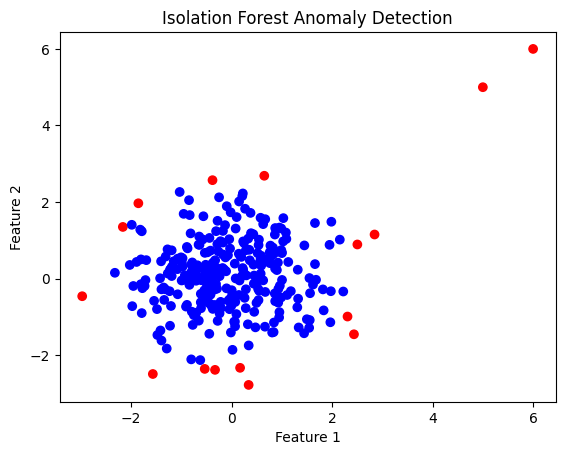

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Example data
X = np.random.randn(300, 2)  # normal points
X = np.vstack([X, [[5, 5], [6, 6]]])  # anomalies

# Fit Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X)
y_pred = clf.predict(X)  # 1 = normal, -1 = anomaly

# Plot
plt.scatter(X[:,0], X[:,1], c=['red' if i==-1 else 'blue' for i in y_pred])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Isolation Forest Anomaly Detection")
plt.show()



✅ Blue points → normal, red points → anomalies

---

## **7. Summary**

* **Isolation Forest isolates anomalies rather than profiling normal points**.
* Outliers are separated quickly (short path), normal points slowly (long path).
* Uses multiple trees for robustness.
* Generates an **anomaly score** to classify points.
